In [334]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
%matplotlib inline
import plotly.express as px

In [335]:
def random_hex_generator(howmany):
    hexlist = []
    for x in range(0,int(howmany)):
        r = lambda: np.random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        hexlist.append(color)
    return hexlist

## Analysis of 'Matches' dataset
- Match-by-Match data

In [336]:
matches = pd.read_csv('matches.csv')
matches2 = matches.copy()
matches2['type'] = 'group stage'

# correcting match id
for year in range(2018,2019):
    matches2['id'] = matches2.index.values + 1

# setting match type (group stage, qualifier 1, eliminator, qualifier 2, final)
for year in range(2008,2020):
    final_index = matches2[matches2['season']==year][-1:].index.values
    #print(final_index)
    matches2.at[final_index,'type'] = 'final'
    matches2.at[final_index - 1,'type'] = 'qualifier 2'
    matches2.at[final_index - 2,'type'] = 'eliminator'
    matches2.at[final_index - 3,'type'] = 'qualifier 1'

In [337]:
# cleaning rest of the data
matches2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant',
                  'Kochi Tuskers' : 'Kochi Tuskers Kerala',
                  'Delhi Daredevils':'Delhi Capitals',
                  'Pune Warriors':'Pune Warriors India'}, inplace=True)

all_teams = []
for t in matches2['team1']:
    if t not in all_teams:
        all_teams.append(t)

matches2.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla Stadium',
                  'Feroz Shah Kotla' : 'Feroz Shah Kotla Stadium',
                  'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                  'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                  'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                  'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                  'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                  'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                  'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                  'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium', 
                  'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':'Dr. Y.S.R. ACA-VDCA Cricket Stadium',
                  'Dr. Y.S.R. ACA VDCA Cricket Stadium':'Dr. Y.S.R. ACA-VDCA Cricket Stadium',
                  'ACA-VDCA Stadium':'Dr. Y.S.R. ACA-VDCA Cricket Stadium',
                  'Dr DY Patil Sports Academy':'Dr. D.Y. Patil Stadium', 
                  'Sardar Patel Stadium, Motera':'Sardar Patel Stadium',
                  'Subrata Roy Sahara Stadium':'Maharashtra Cricket Association Stadium',
                  'Green Park':'Green Park Stadium',
                  'Vidarbha Cricket Association Stadium, Jamtha':'Vidarbha Cricket Association Stadium',
                  'Nehru Stadium':'Jawaharlal Nehru Stadium',
                  'JSCA International Stadium Complex':'JSCA International Stadium'}, inplace=True)
all_venues = []
for v in matches2['venue']:
    if v not in all_venues:
        all_venues.append(v)
        
matches2.replace({'Bangalore':'Bengaluru'}, inplace=True)
all_cities = []
for c in matches2['city']:
    if c not in all_venues:
        all_cities.append(c)

In [338]:
# colors for each team
c_mi='#1722FE' 
c_csk='#FEE917' 
c_kkr='#7D17FE' 
c_rcb='#FF1D1D' 
c_kxip='#FF4B4B' 
c_rr='#F520FF' 
c_dd='#A74242' 
c_srh='#FF8700' 
c_dcr='#8AA0AE' 
c_rps='#C98ECB' 
c_gl='#F0CA6D' 
c_pw='#6DF0F0' 
c_dc='#00ABE2' 
c_kt='#C8B18B'

# creating mpatches for legend
import matplotlib.patches as mpatches
teams = ['Mumbai Indians','Chennai Super Kings','Kolkata Knight Riders','Royal Challengers Bangalore',
         'Kings XI Punjab','Rajasthan Royals','Delhi Daredevils','Sunrisers Hyderabad','Deccan Chargers',
         'Rising Pune Supergiant','Gujarat Lions','Pune Warriors','Delhi Capitals','Kochi Tuskers']
clist = [c_mi,c_csk,c_kkr,c_rcb,c_kxip,c_rr,c_dd,c_srh,c_dcr,c_rps,c_gl,c_pw,c_dc,c_kt]
mp_list = []
for i in range(0,14):
    x = mpatches.Patch(color=clist[i], label=teams[i])
    mp_list.append(x)
# mp = series of mpatches     
mp = pd.Series(mp_list,index=('mi','csk','kkr','rcb','kxip','rr','dd','srh','dcr','rps','gl','pw','dc','kt'))

In [339]:
# calculating win percent per year
total = pd.DataFrame(index=all_teams)
for year in range(2008,2020):
    total['wins %d' %year] = 0
    seasonal = matches2[matches2['season']==year]
    for team in all_teams:
        ct = 0
        for x in seasonal['winner']:
            if x==team: ct += 1
        total.at[team,'wins %d' %year] = ct

for year in range(2008,2020):
    total['total %d' %year] = 0
    seasonal = matches2[matches2['season']==year]
    for team in all_teams:
        ct = 0
        for x in seasonal['team1']:
            if x==team: ct += 1
        for x in seasonal['team2']:
            if x==team: ct += 1
        total.at[team,'total %d' %year] = ct

win_percent = pd.DataFrame(index=all_teams)
for year in range(2008,2020):
    win_percent['%d' %year] = (total['wins %d' %year] / total['total %d' %year]) * 100

### My 4 favourite IPL Teams' win % over 12 years
This Plot was made as a part of an assigment for Coursera

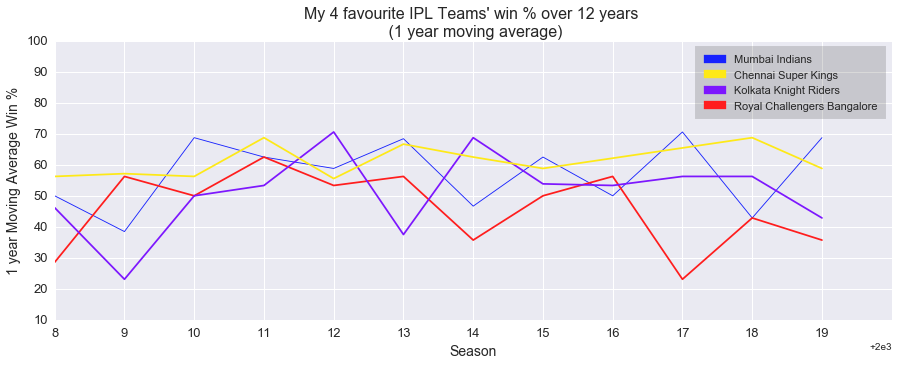

In [340]:
# plot - Line - seaborn
plt.style.use('seaborn-darkgrid')
fig1 = plt.figure(figsize=(15,5))

sns.lineplot(range(2008,2020), win_percent.T['Mumbai Indians'], color=c_mi, size=10)
sns.lineplot(range(2008,2020), win_percent.T['Royal Challengers Bangalore'], color=c_rcb)
sns.lineplot(range(2008,2020), win_percent.T['Kolkata Knight Riders'], color=c_kkr)
sns.lineplot(range(2008,2020), win_percent.T['Chennai Super Kings'], color=c_csk)

plt.legend(frameon=True, borderpad = 0.75, facecolor='black', framealpha=0.15, fontsize=11,
           handles=[mp['mi'], mp['csk'], mp['kkr'], mp['rcb']])

plt.xticks(range(2008,2020),fontsize=13)
plt.yticks(range(10,110,10),fontsize=13)
plt.xlabel('Season',fontsize=14)
plt.ylabel('1 year Moving Average Win %',fontsize=14)
plt.title("My 4 favourite IPL Teams' win % over 12 years \n (1 year moving average)",fontsize=16)

plt.show()

### Total Wins vs. Total Matches Played

In [341]:
# win percent 
wins = pd.DataFrame(matches2['winner'].value_counts())
wins['team'] = wins.index
wins['total_played'] = pd.DataFrame(matches2['team1'].value_counts() + matches2['team2'].value_counts())
wins['winpercent'] = (wins['winner']/wins['total_played'])*100

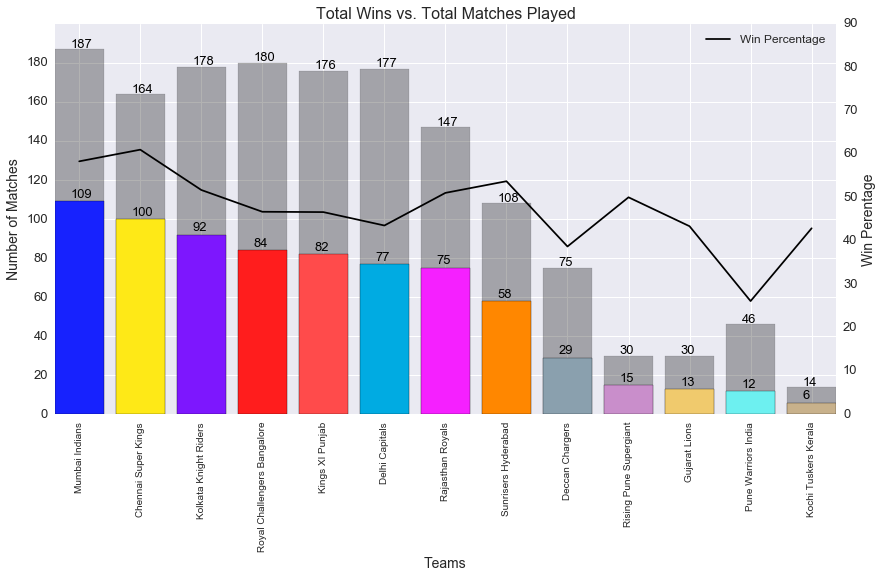

In [342]:
# plot - Bar, Line - matplotlib
fig2 = plt.figure(figsize=(14,7))

p1 = plt.bar(wins['team'], wins['total_played'], color='black', alpha=0.3)
p2 = plt.bar(wins['team'], wins['winner'],
             color=[c_mi,c_csk,c_kkr,c_rcb,c_kxip,c_dc,c_rr,c_srh,c_dcr,c_rps,c_gl,c_pw,c_kt])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(np.arange(0,200,20), fontsize=13)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.title('Total Wins vs. Total Matches Played', fontsize=16)

xpos=0
for val in wins['winner']:
    plt.text(xpos-0.15, val+2, str(val), color='black', fontsize=13)
    xpos+=1
    
x_pos=0
for val in wins['total_played']:
    plt.text(x_pos-0.15, val+1, str(val), color='black', fontsize=13)
    x_pos+=1

ax = plt.gca()
ax2 = ax.twinx()
ax2.yaxis.grid(False)
ax2.plot(wins['team'], wins['winpercent'], color='black')
plt.yticks(np.arange(0,100,10), fontsize=13)
plt.ylabel('Win Perentage', fontsize=14)
plt.legend(['Win Percentage'], fontsize=12)
plt.show()

### Most "Man of the Match" Awardees

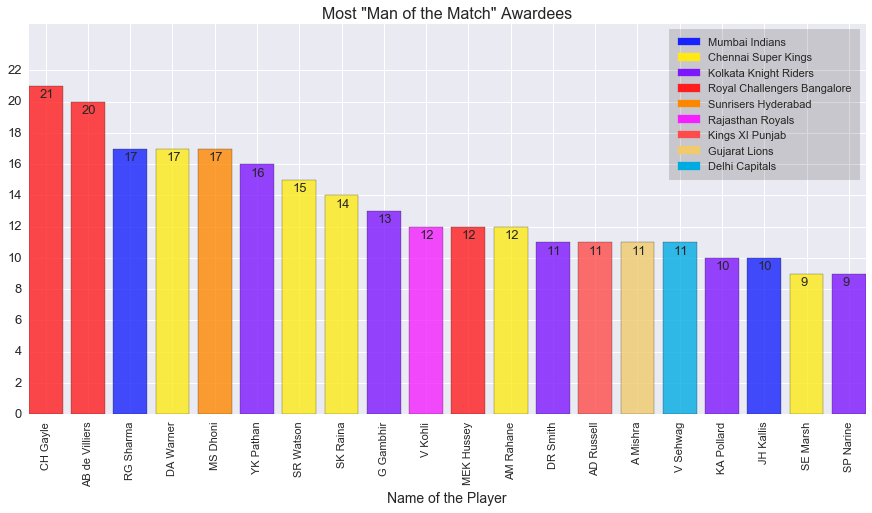

In [343]:
# man of the match
mom = matches2['player_of_match'].value_counts().reset_index()[:20]
mom.columns = ['Player','count']
mom = mom.set_index('Player') 
mom['Team Color'] = [c_rcb,c_rcb,c_mi,c_csk,c_srh,c_kkr,c_csk,c_csk,c_kkr,c_rr,c_rcb,c_csk,c_kkr,c_kxip,c_gl,c_dc,c_kkr,c_mi,c_csk,c_kkr]

# plot
fig3 = plt.figure(figsize=(15,7))
plt.bar(mom.index, mom['count'], color=mom['Team Color'], alpha=0.8)

plt.xticks(rotation=90, fontsize=11)
plt.yticks(np.arange(0,24,2), fontsize=13)
plt.xlabel('Name of the Player', fontsize=14)
plt.title('Most "Man of the Match" Awardees', fontsize=16)
xpos=0
for val in mom['count']:
    plt.text(xpos-0.15, val-0.75, str(val), fontsize=13)
    xpos+=1
    
plt.legend(frameon=True, borderpad = 0.75, facecolor='black', framealpha=0.15, fontsize=11,
           handles=[mp['mi'], mp['csk'], mp['kkr'], mp['rcb'], mp['srh'], mp['rr'], mp['kxip'], mp['gl'], mp['dc']])

plt.show()

### Top 15 Stadiums that have hosted IPL matches

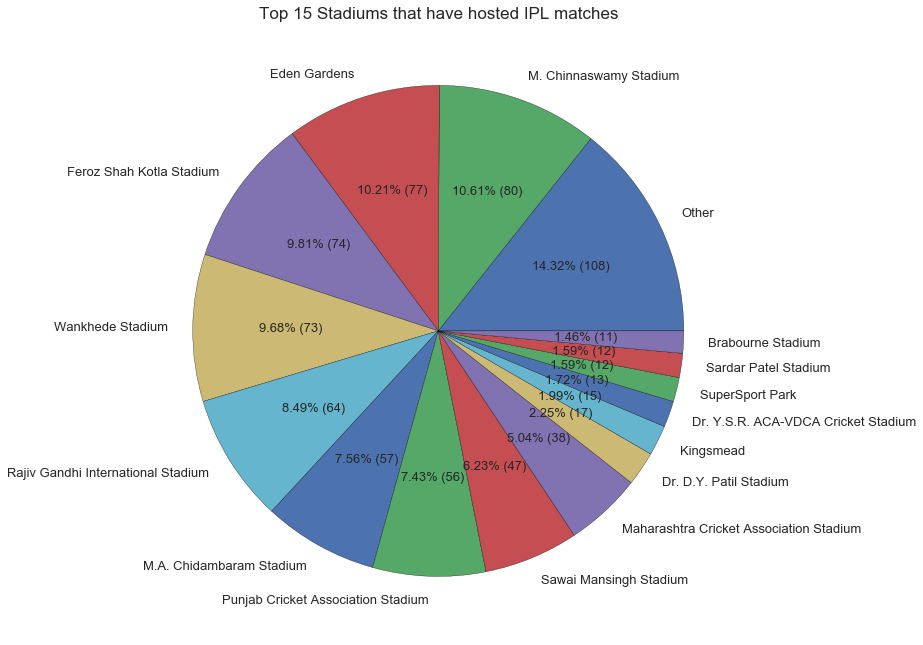

In [344]:
# stadiums
top_venue = pd.DataFrame(matches2['venue'].value_counts())
top_venue.at['Other','venue'] = top_venue.venue[15:-1].sum()
top_venue.at['Total','venue'] = top_venue.venue.sum()
top_venue.sort_values('venue',ascending=False, inplace=True)

# plot - Pie - matplotlib
fig4 = plt.figure(figsize=(11,11))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct
#autopct='%1.1f%%'
plt.pie(top_venue['venue'][1:17], labels=top_venue.index[1:17], startangle=0,
        autopct=make_autopct(top_venue['venue'][1:17]), textprops={'fontsize':13})
plt.title('Top 15 Stadiums that have hosted IPL matches', fontsize=17)
plt.show()

### No. of matches hosted by each stadium

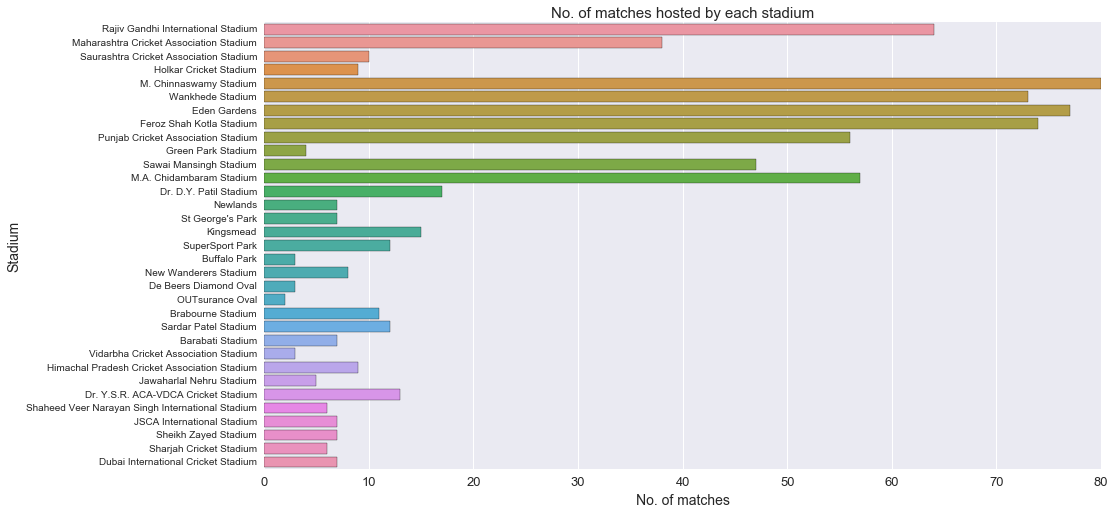

In [345]:
#plot - Countplot - seaborn
fig5 = plt.figure(figsize=(15,8))
sns.countplot(y='venue', data=matches2)

plt.title('No. of matches hosted by each stadium', fontsize=15)
plt.xlabel('No. of matches', fontsize=14)
plt.ylabel('Stadium', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=10)
plt.show()

### Top 15 Cities that have hosted IPL matches

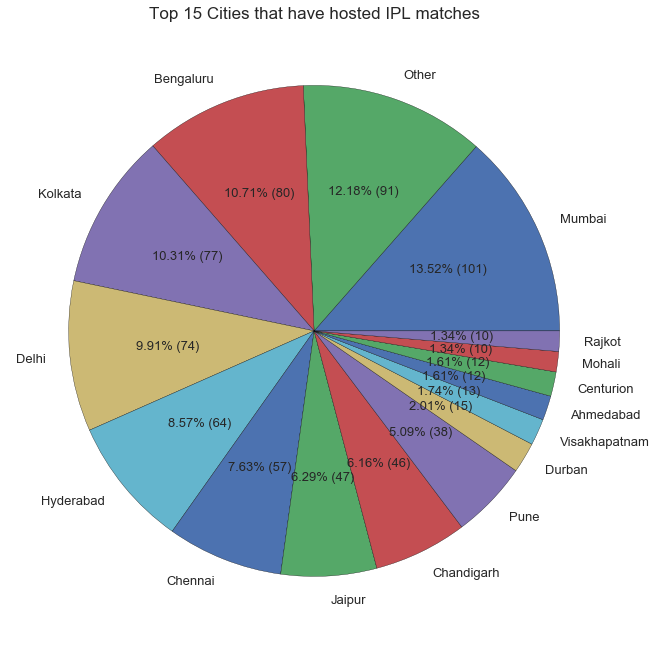

In [346]:
# city
top_cities = pd.DataFrame(matches2['city'].value_counts())
top_cities.at['Other','city'] = top_cities.city[15:-1].sum()
top_cities.at['Total','city'] = top_cities.city.sum()
top_cities.sort_values('city',ascending=False, inplace=True)

#plot - Pie - matplotlib

fig6 = plt.figure(figsize=(11,11))

plt.pie(top_cities['city'][1:17], labels=top_cities.index[1:17], startangle=0,
        autopct=make_autopct(top_cities['city'][1:17]), textprops={'fontsize':13})
plt.title('Top 15 Cities that have hosted IPL matches', fontsize=17)
plt.show()

### No. of matches hosted by each city

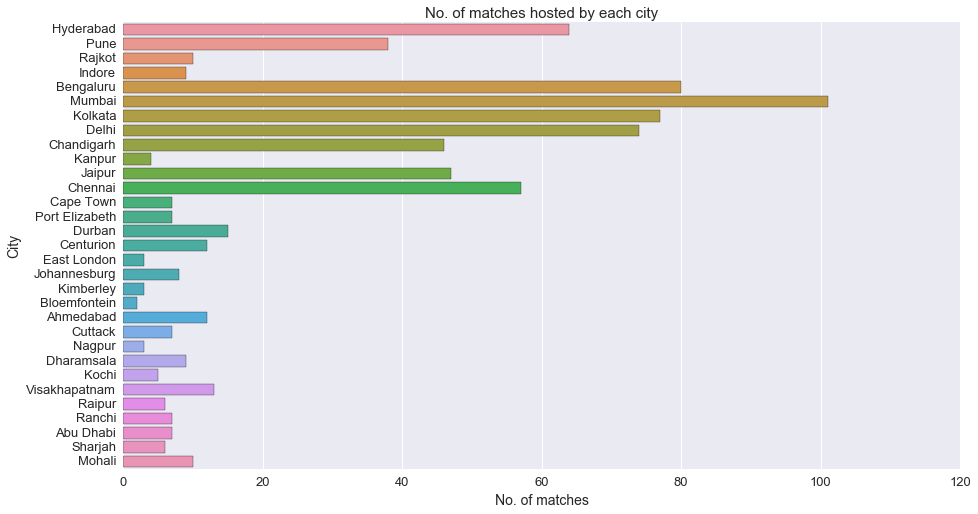

In [347]:
# plot - Countplot - seaborn
fig7 = plt.figure(figsize=(15,8))
sns.countplot(y='city', data=matches2)

plt.title('No. of matches hosted by each city', fontsize=15)
plt.xlabel('No. of matches', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### No. of matches held per season

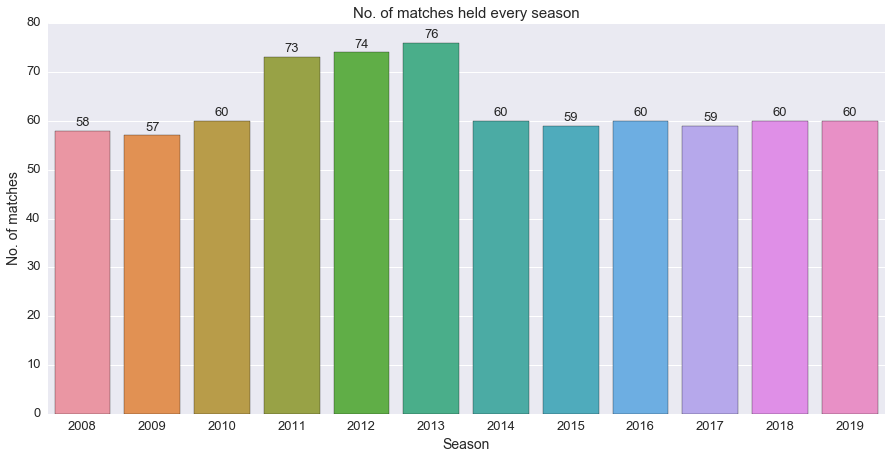

In [348]:
# per season
m_per_season = matches2[['season','id']].groupby('season').count().reset_index()
m_per_season.columns = ['Season','No. of Matches']

# plot - CountPlot - seaborn
fig8 = plt.figure(figsize=(15,7))
sns.countplot(data=matches2, x='season') #palette=colors_from_values(m_per_season['No. of Matches'], 'twilight_shifted'))
plt.title('No. of matches held every season', fontsize=15)
plt.xlabel('Season', fontsize=14)
plt.ylabel('No. of matches', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
xpos=0
for val in m_per_season['No. of Matches']:
    plt.text(xpos-0.1, val+1, val, fontsize=13)
    xpos+=1
plt.show()

### Season-wise summary of matches won by 'runs'

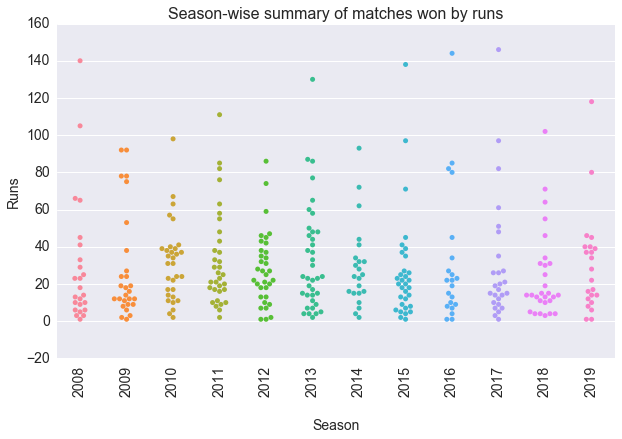

In [349]:
fig9 = plt.figure(figsize=(10,6))
sns.swarmplot(matches2['season'], matches2[matches2['win_by_runs']!=0]['win_by_runs'])
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('\nSeason',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season-wise summary of matches won by runs',fontsize=16)
plt.show()

### Season-wise summary of matches won by 'wickets'

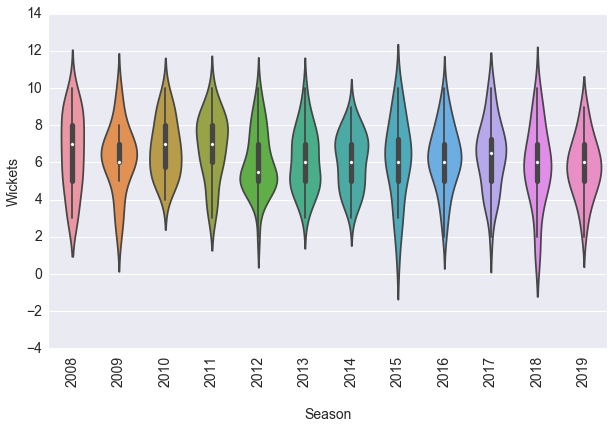

In [350]:
fig10 = plt.figure(figsize=(10,6))
sns.violinplot(matches2['season'],matches2[matches2['win_by_wickets']!=0]['win_by_wickets'], inner='box')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('\nSeason',fontsize=14)
plt.ylabel('Wickets',fontsize=14)
#plt.title('Season wise summary of matches won by wickets',fontsize=16)
plt.show()

## Analysis of 'Deliveries' dataset
- Ball-by-Ball data

### Leading Run Scorers

In [351]:
deliveries = pd.read_csv('deliveries.csv')

# batsman with most runs
top_batsmen = deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).sort_values(ascending=False)
top_batsmen = top_batsmen.reset_index()[:15]
top_batsmen.columns = ['Batsman', 'Runs']
top_batsmen['Team Color'] = [c_rcb,c_csk,c_mi,c_srh,c_dc,c_kxip,c_csk,c_rr,c_rcb,c_kkr,c_rr,c_kkr,c_csk,c_csk,c_kkr]

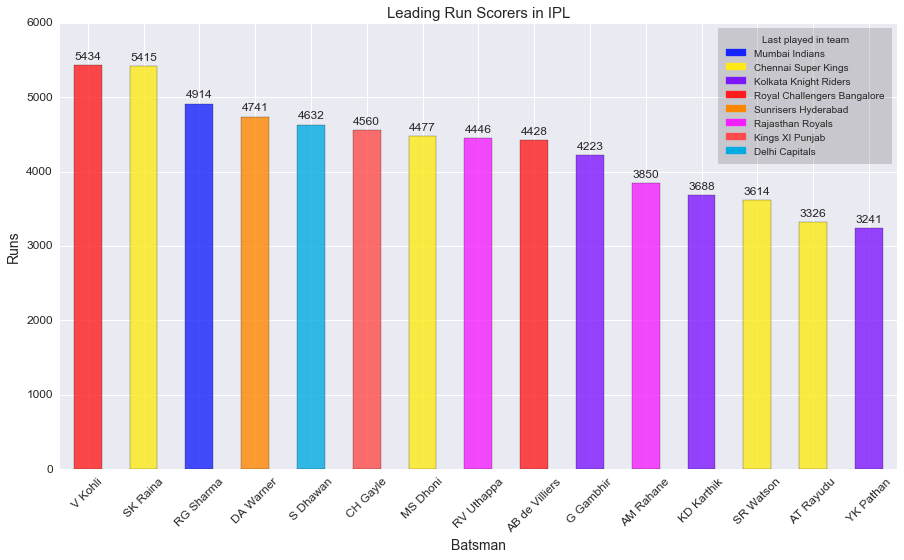

In [352]:
# plot - Bar - DataFrame.plot
fig11 = top_batsmen.plot(kind='bar', x='Batsman', y='Runs', color=top_batsmen['Team Color'], 
                        figsize=(15,8), alpha=0.8, fontsize=12)
xpos=0
for val in top_batsmen['Runs']:
    plt.text(xpos-0.24, val+75, val, fontsize=12)
    xpos+=1
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.xticks(rotation=45)
plt.title('Leading Run Scorers in IPL', fontsize=15)
plt.legend(title='Last played in team', title_fontsize=10, 
           frameon=True, borderpad = 0.75, facecolor='black', framealpha=0.15, fontsize=10,
           handles=[mp['mi'], mp['csk'], mp['kkr'], mp['rcb'], mp['srh'], mp['rr'], mp['kxip'], mp['dc']])
plt.show()

### Leading Run Scorers
- Using Plotly

In [353]:
# plot - Bar - plotly
fig12 = px.bar(top_batsmen, x='Batsman', y='Runs', hover_data=['Batsman'], 
            color='Runs',title='Leading Run Scorers')
fig12.update_layout(autosize=False, width=800, height=500)
fig12

### Leading Wicket Takers

In [354]:
# bowler with most wickets
wickets = deliveries[deliveries['dismissal_kind']!='run out']
top_bowlers = wickets.groupby('bowler')['dismissal_kind'].count().reset_index(name='Wickets').sort_values('Wickets', ascending=False)[:15]
top_bowlers.columns = ['Bowler','Wickets']
top_bowlers['team color'] = [c_mi,c_dc,c_csk,c_kkr,c_csk,c_srh,c_kxip,c_kkr,c_rcb,c_csk,c_srh,c_kkr,c_gl,c_rcb,c_rcb]

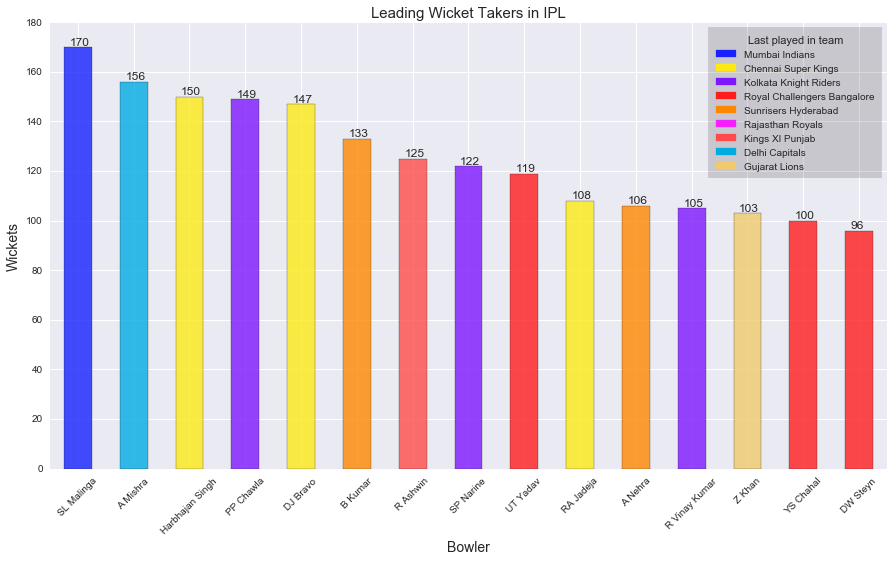

In [355]:
# plot - Bar - DataFrame.plot
fig13 = top_bowlers.plot(kind='bar', x='Bowler', y='Wickets', figsize=(15,8), color=top_bowlers['team color'], alpha=0.8)
xpos=0
for val in top_bowlers['Wickets']:
    plt.text(xpos-0.15, val+1, val, fontsize=12)
    xpos+=1
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.title('Leading Wicket Takers in IPL', fontsize=15)
plt.legend(title='Last played in team', title_fontsize=11, 
           frameon=True, borderpad = 0.75, facecolor='black', framealpha=0.15, fontsize=10,
           handles=[mp['mi'], mp['csk'], mp['kkr'], mp['rcb'], mp['srh'], mp['rr'], mp['kxip'], mp['dc'],mp['gl']])
plt.show()

### Leading Wicket Takers 
- Using Plotly 

In [356]:
fig14 = px.bar(top_bowlers, x='Bowler', y='Wickets', hover_data=['Bowler'], 
            color='Wickets',title='Leading Wicket Takers')
fig14.update_layout(autosize=False, width=800, height=500)
fig14

### Top 10 Batting Performances

In [357]:
highest_scores = deliveries.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs', 
                                                                                                            ascending=False)[:10]
balls_faced = deliveries.groupby(['match_id','batsman'])['ball'].count().reset_index()
highest_wsr = pd.merge(highest_scores, balls_faced, how='left', left_on=['match_id','batsman'], right_on=['match_id','batsman'])
highest_wsr['strike rate'] = (highest_wsr['batsman_runs'] / highest_wsr['ball']) *100

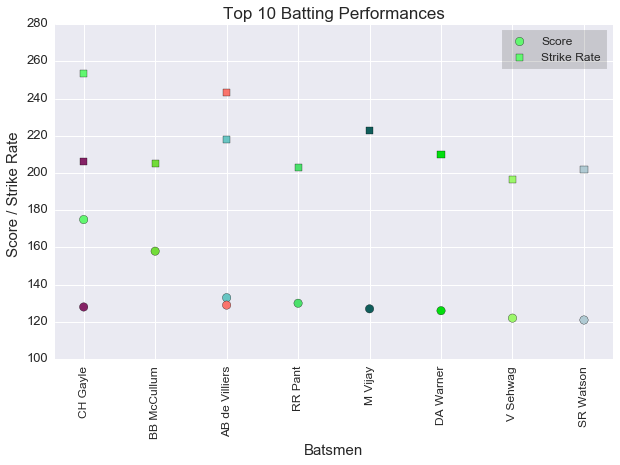

In [358]:
#plot - Scatter - matplotlib
fig15 = plt.figure(figsize=(10,6))
colors=random_hex_generator(10)
s1 = plt.scatter(highest_wsr['batsman'],highest_wsr['batsman_runs'], marker='o', s=70, c=colors)
s2 = plt.scatter(highest_wsr['batsman'],highest_wsr['strike rate'], marker='s', s=50, c=colors)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=13)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Score / Strike Rate ',size=15)
plt.title('Top 10 Batting Performances', fontsize=17)
plt.legend(['Score','Strike Rate'], frameon=True, borderpad = 0.5, facecolor='black', framealpha=0.15, fontsize=12)
plt.show()

### Top 10 Bowling Performances

In [359]:
wickets = deliveries[deliveries['dismissal_kind']!='run out']
wickethauls = wickets.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index(name='wicket haul')

balls_bowled = wickets.groupby(['match_id','bowler'])['ball'].count().reset_index(name='balls bowled')
highest_whb = pd.merge(wickethauls, balls_bowled, how='left', left_on=['match_id','bowler'], right_on=['match_id','bowler']) 

runs_given = wickets.groupby(['match_id','bowler'])['total_runs'].sum().reset_index(name='runs given')
highest_whbr = pd.merge(highest_whb, runs_given, how='left', left_on=['match_id','bowler'], right_on=['match_id','bowler'])

highest_whbr['strike rate'] = highest_whbr['balls bowled']/highest_whbr['wicket haul']
highest_whbr['runs per wicket'] = highest_whbr['runs given']/highest_whbr['wicket haul']
highest_whbr = highest_whbr.sort_values(['strike rate','runs per wicket'], ascending=True).sort_values('wicket haul',ascending=False)[:10]

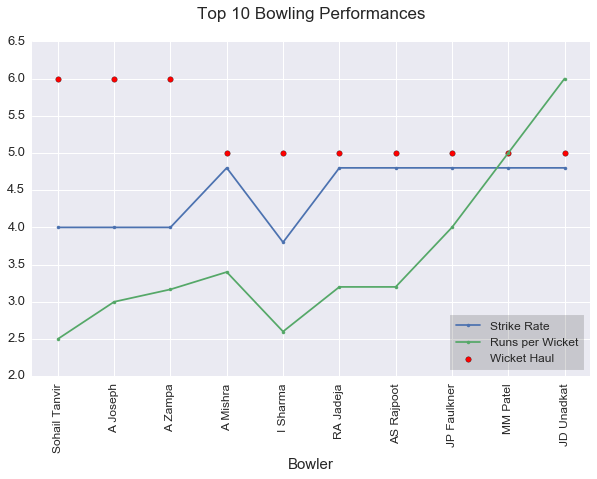

In [360]:
# plot - Scatter - matplotlib
fig16 = plt.figure(figsize=(10,6))
s3 = plt.scatter(highest_whbr['bowler'], highest_whbr['wicket haul'], marker='o', s=30, c='red')
s4 = plt.plot(highest_whbr['bowler'], highest_whbr['strike rate'], marker='.')
s5 = plt.plot(highest_whbr['bowler'], highest_whbr['runs per wicket'], marker='.')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=13)
plt.xlabel('Bowler',size=15)
#plt.ylabel('Wicket Haul / Strike Rate / Runs per Wicket',size=14)
plt.title('Top 10 Bowling Performances\n', fontsize=17)
plt.legend(['Strike Rate','Runs per Wicket','Wicket Haul'], loc=4,
           frameon=True, borderpad = 0.5, facecolor='black', framealpha=0.15, fontsize=12)
plt.show()

### Ways of Dismissals

In [361]:
ways = deliveries['dismissal_kind'].value_counts().reset_index()
ways.columns = ['Dismissal Way', 'Count']

#plot - Pie - Plotly
fig17 = px.pie(ways, values='Count', names='Dismissal Way',title='Ways of Dismissals')
fig17.update_traces(textposition='inside', textinfo='percent+label')
fig17.update_layout(autosize=False, width=700, height=600)
fig17

##### Flourish - Bar Chart Race

In [362]:
# cleaning for flourish - bar chart race
matches3 = matches2.sort_values(['season','id'], ascending=True).reset_index().drop(['index'], axis=1)
#date = pd.to_datetime(matches3['date'])
#matches3['date'] = date
matches3['new_id'] = matches.index
matches3['winner'] = matches3['winner'].fillna('no result')
#matches3.to_csv('matches3.csv')

In [363]:
# creating a new dataset 'flourish'
if 'no result' not in all_teams:
    all_teams.append('no result')
flourish = pd.DataFrame()
teamsct = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0], index=all_teams)
teamsct.name = 'teams count'
#teamsct.columns = ['count']
for i in range(0,756):
    for x in all_teams:
        if matches3['winner'][i] == x: 
            teamsct.at[matches3['winner'][i]]+=1
            teamsct.name = matches3['date'][i]
            flourish = flourish.append(teamsct, ignore_index=False)

finalflourish = flourish.T
#finalflourish.to_csv('finalflourish.csv')